In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
np.random.seed(42)

1. DATA LOADING & INITIAL OVERVIEW


In [10]:
df = pd.read_csv('/content/student_data.csv')



In [11]:
print("DATA INFO:")
print(df.info())

DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-

In [12]:
print("\nSTATISTICAL DESCRIPTION:")
print(df.describe(include='all'))


STATISTICAL DESCRIPTION:
        Hours_Studied   Attendance Parental_Involvement Access_to_Resources  \
count     6607.000000  6607.000000                 6607                6607   
unique            NaN          NaN                    3                   3   
top               NaN          NaN               Medium              Medium   
freq              NaN          NaN                 3362                3319   
mean        19.975329    79.977448                  NaN                 NaN   
std          5.990594    11.547475                  NaN                 NaN   
min          1.000000    60.000000                  NaN                 NaN   
25%         16.000000    70.000000                  NaN                 NaN   
50%         20.000000    80.000000                  NaN                 NaN   
75%         24.000000    90.000000                  NaN                 NaN   
max         44.000000   100.000000                  NaN                 NaN   

       Extracurricular_Ac

In [17]:
print("\nMISSING VALUES PER COLUMN:")
print(df.isnull().sum())



MISSING VALUES PER COLUMN:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


**2. EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATIONS**


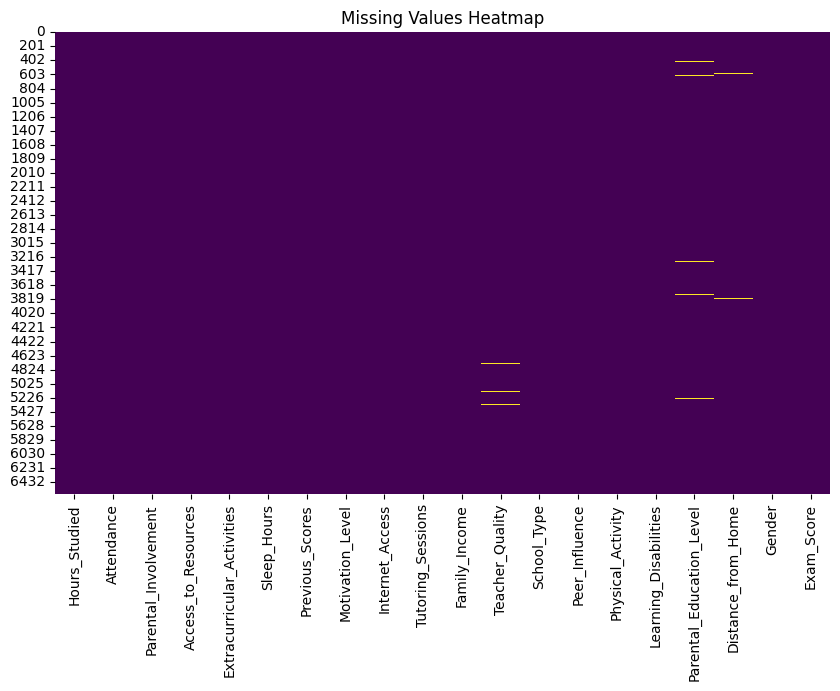

In [19]:
# 2.1 Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


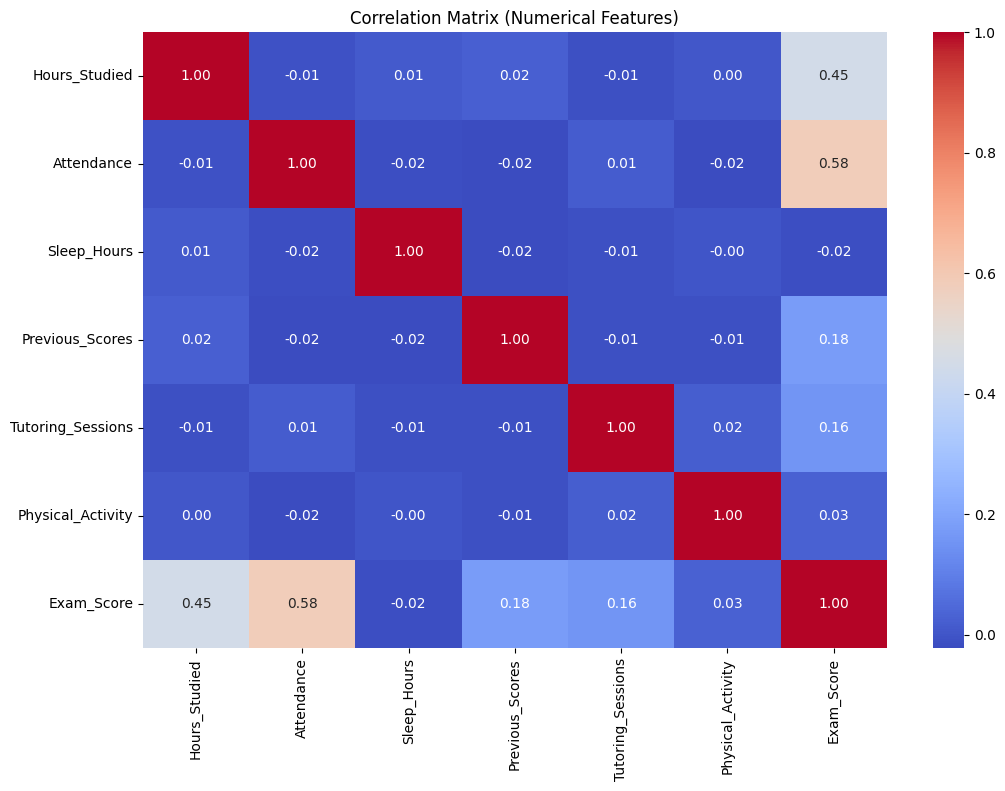

In [20]:
# 2.2 Correlation Matrix (for numerical features)
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                  'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


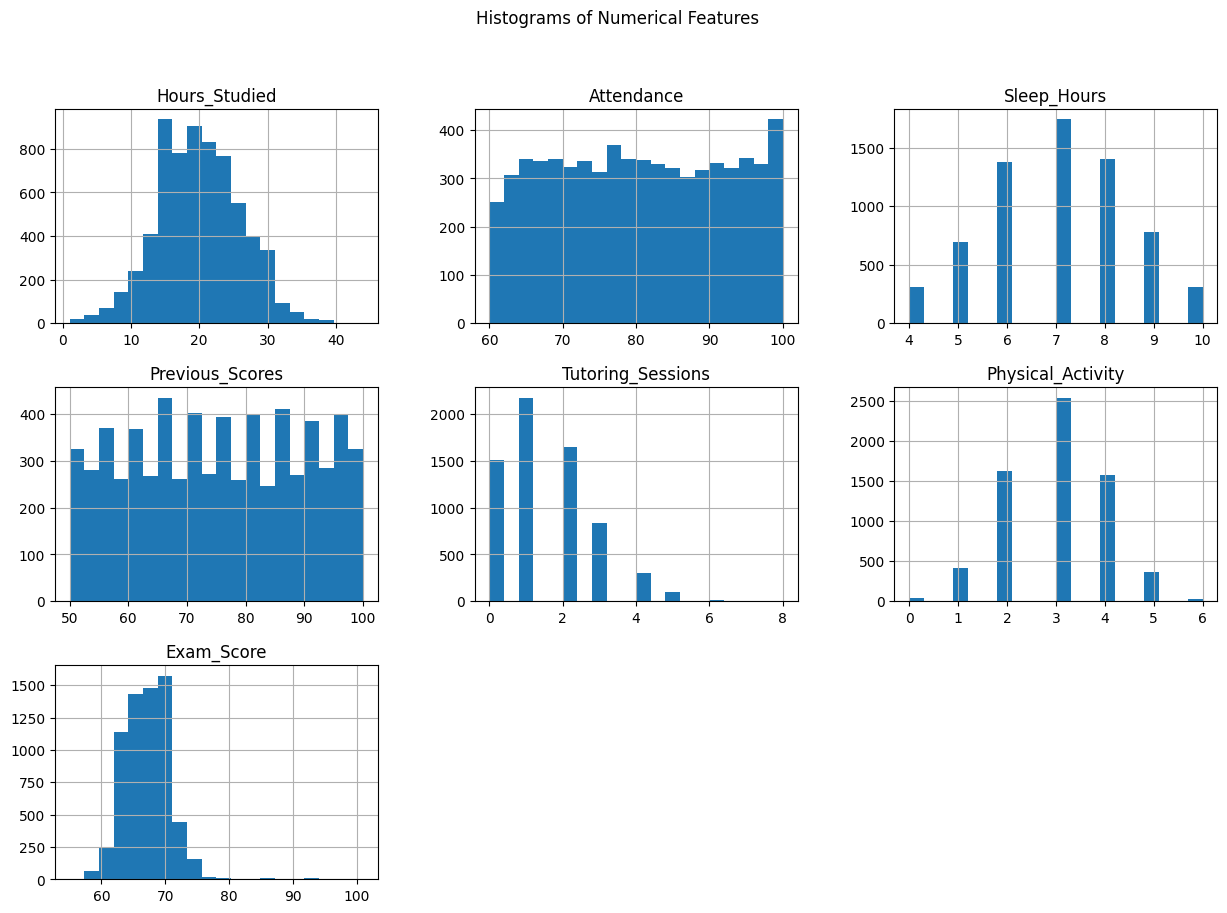

In [21]:
# 2.3 Histograms for Numerical Features
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


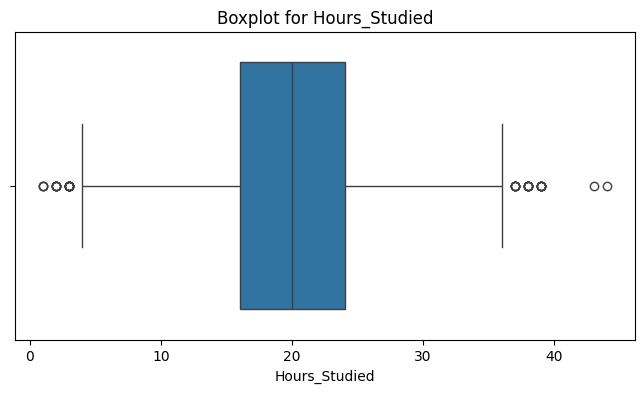

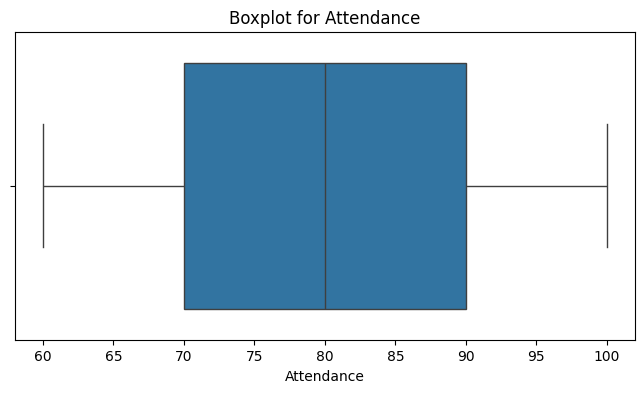

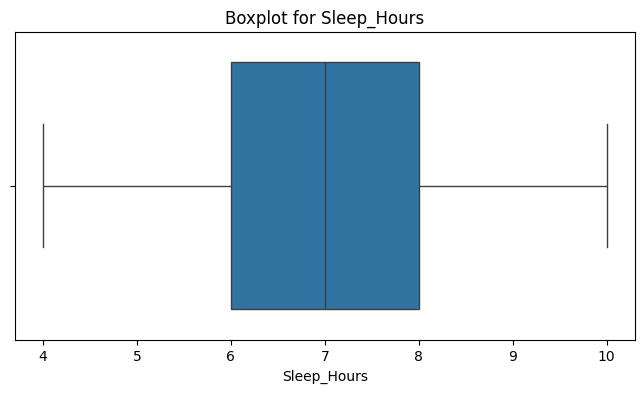

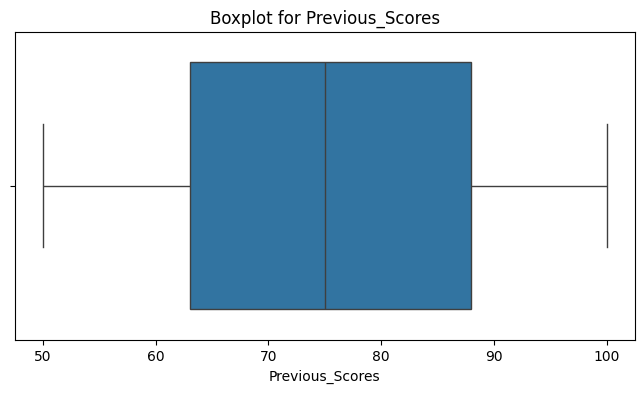

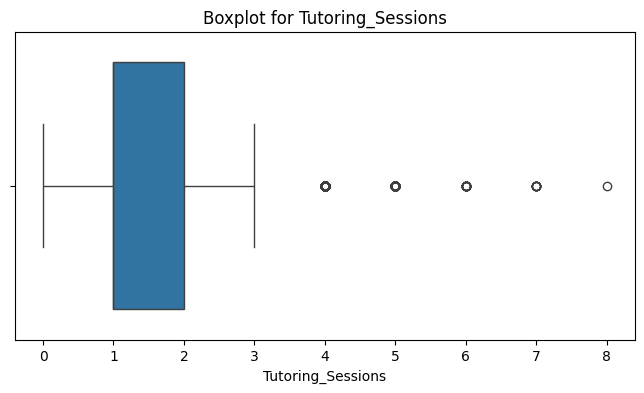

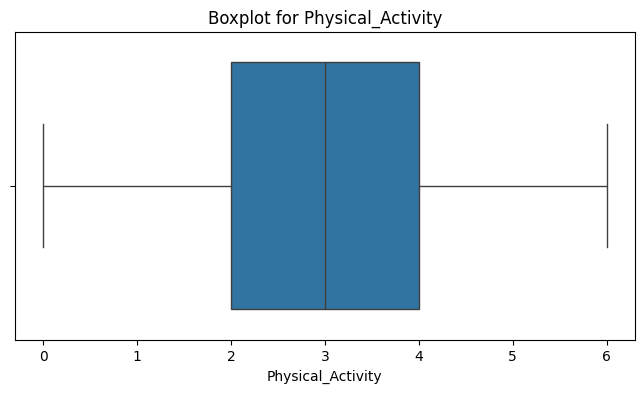

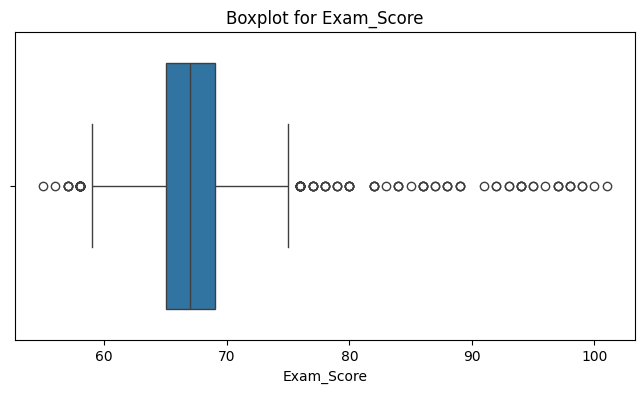

In [22]:
# 2.4 Boxplots for Numerical Features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


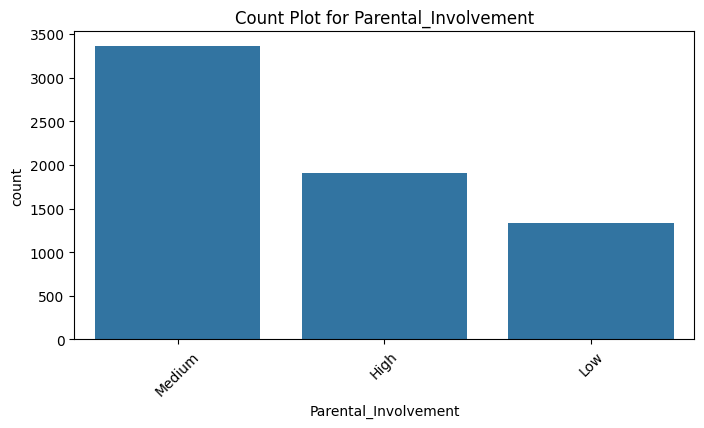

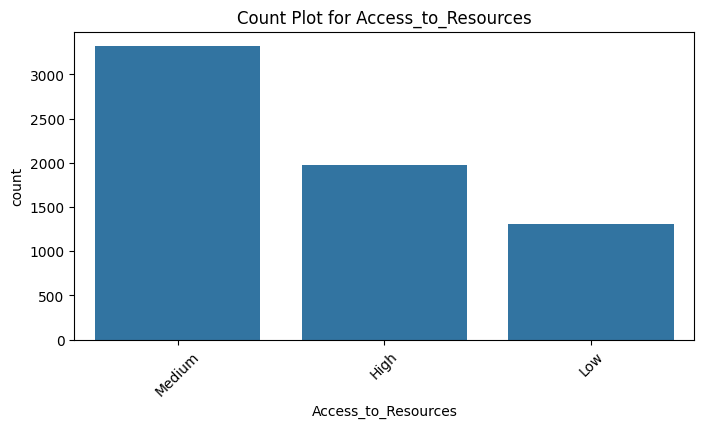

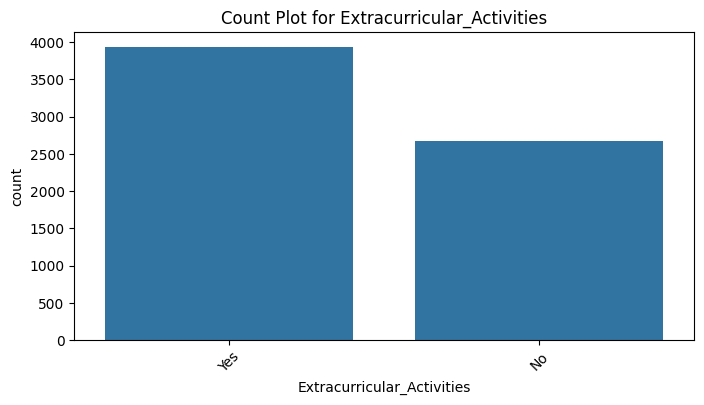

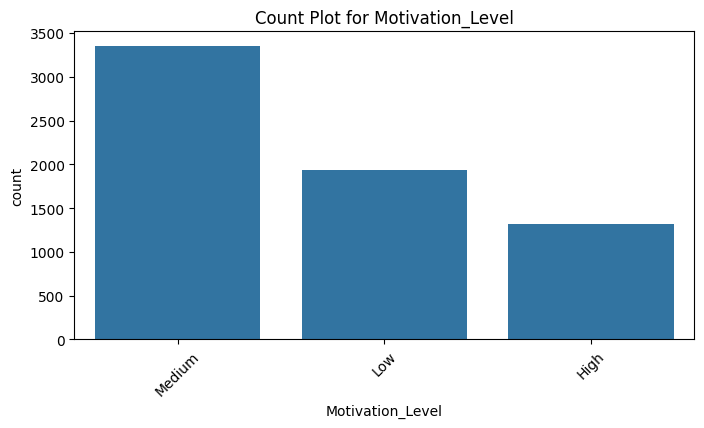

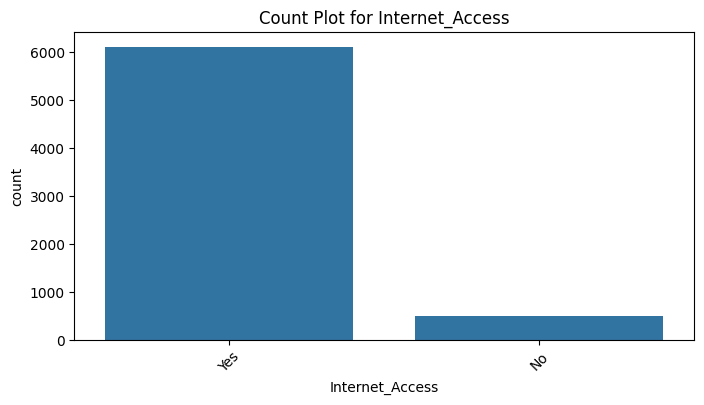

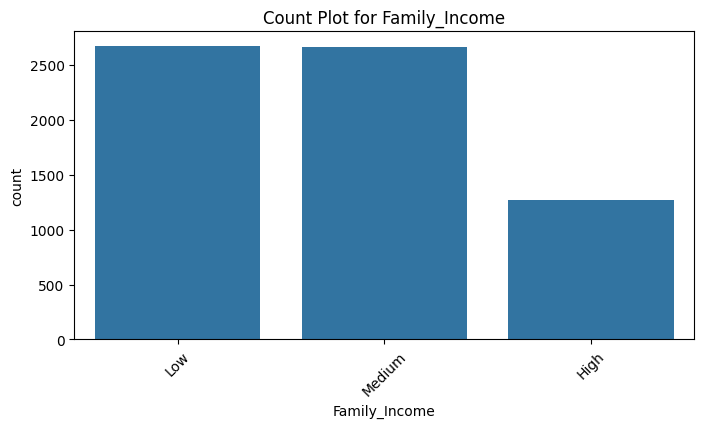

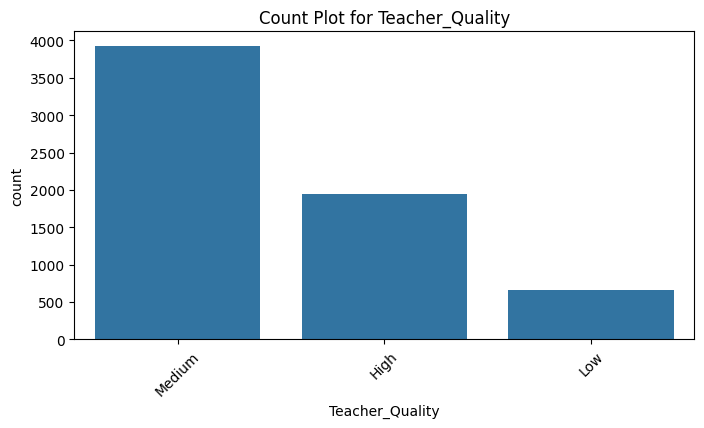

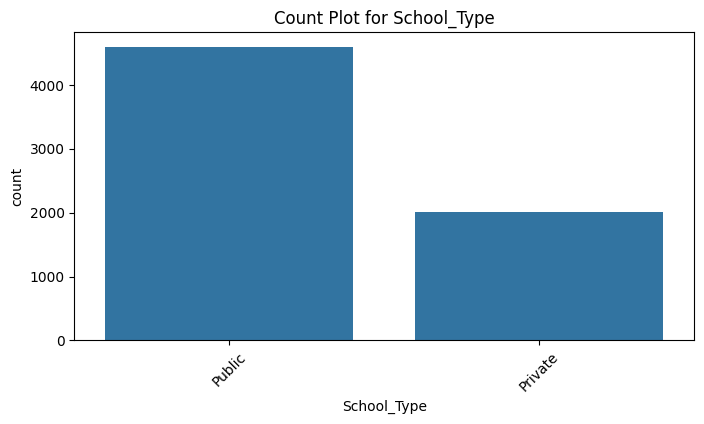

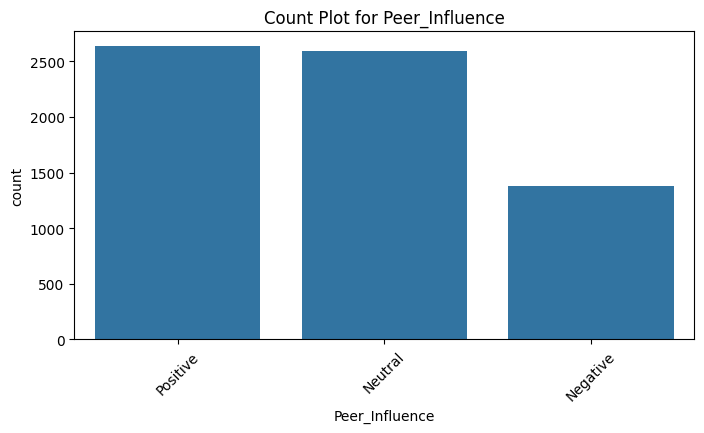

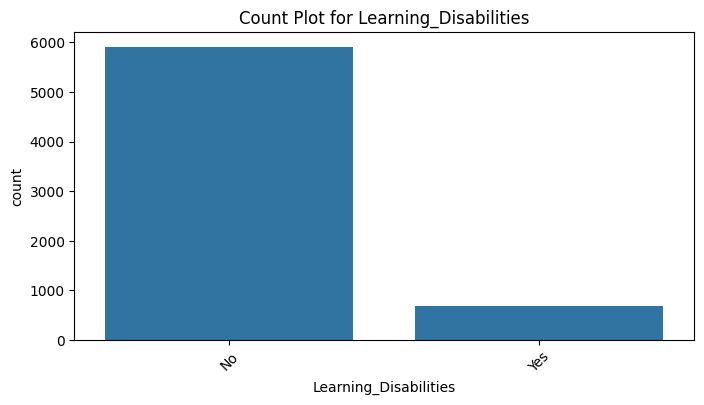

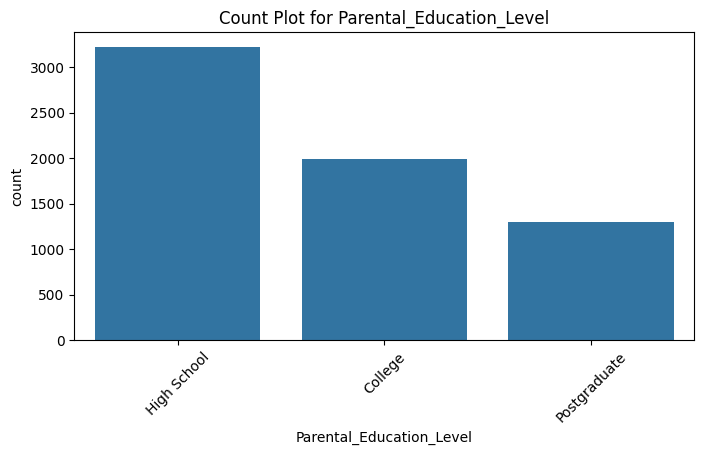

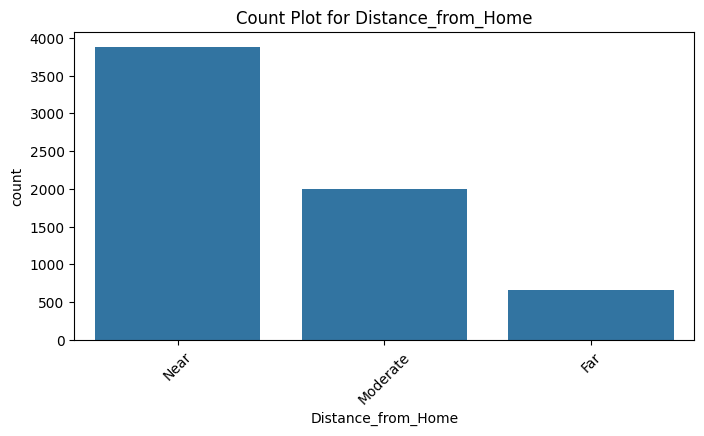

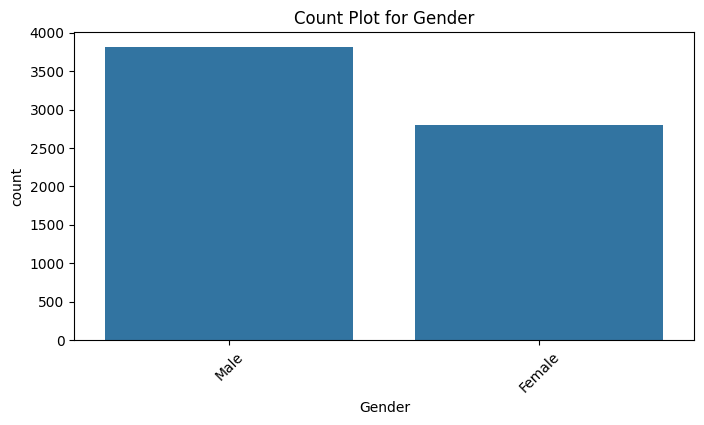

In [23]:
# 2.5 Count Plots for Categorical Features
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()



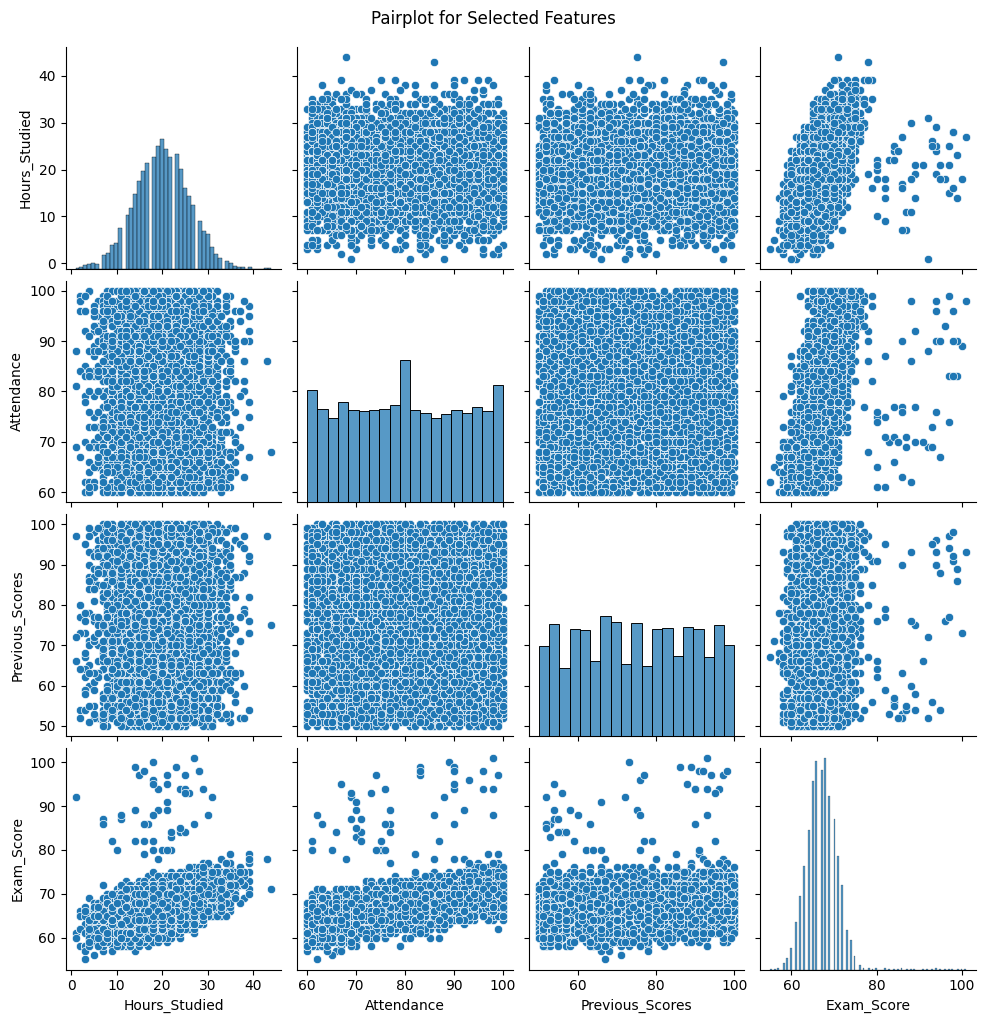

In [24]:
# 2.6 Pairplot (subset of features for clarity)
subset_cols = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
sns.pairplot(df[subset_cols])
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()


### **3. DATA PREPROCESSING**


In [26]:
# Fix missing values without inplace=True
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Define mapping dictionaries for ordinal features:
mapping_dicts = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}
}
for col, mapping in mapping_dicts.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Map binary features
binary_mapping = {'Yes': 1, 'No': 0}
binary_cols = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)

# For Gender and School_Type (nominal), use LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['School_Type'] = le.fit_transform(df['School_Type'])

# Normalize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



Regression Model Evaluation:
MAE: 0.36610804440674277
MSE: 0.3992196714922818
R2 Score: 0.5725856264764716


<ipython-input-28-8af86d708512>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=features[sorted_indices], palette='coolwarm')


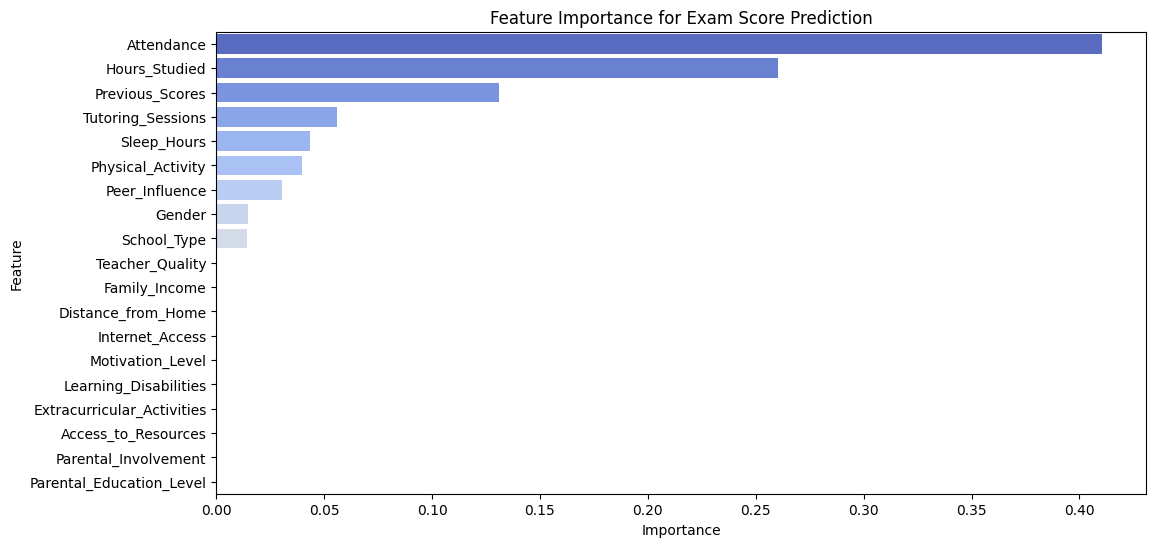

In [28]:
# Convert non-numeric columns to numeric using Label Encoding or proper mapping
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to non-numeric columns
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Regression Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualize Feature Importance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices], palette='coolwarm')
plt.title('Feature Importance for Exam Score Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


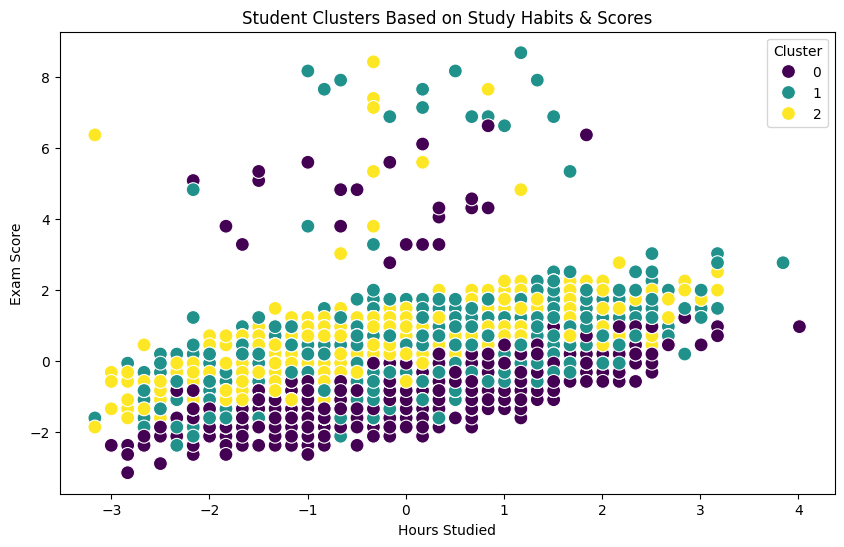

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Define clustering features
clustering_features = ['Hours_Studied', 'Motivation_Level', 'Attendance', 'Previous_Scores']

# Fill columns with only NaNs with 0 (or another default value)
df[clustering_features] = df[clustering_features].fillna(0)

# Handle missing values by filling with the mean of each column (optional)
imputer = SimpleImputer(strategy='mean')
df[clustering_features] = pd.DataFrame(imputer.fit_transform(df[clustering_features]), columns=clustering_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[clustering_features])

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Hours_Studied'], y=df['Exam_Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Student Clusters Based on Study Habits & Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()



In [43]:
def generate_recommendation(row, df):
    """
    Generates a detailed recommendation based on every feature in the student data.
    This function uses the original (non-normalized, non-encoded) values.
    """
    recs = []

    # Hours Studied
    if row['Hours_Studied'] < df['Hours_Studied'].median():
        recs.append("Increase study hours to build a stronger knowledge base.")
    else:
        recs.append("Study hours are satisfactory; continue your routine.")

    # Attendance
    if row['Attendance'] < df['Attendance'].median():
        recs.append("Improve attendance to avoid missing key lessons.")
    else:
        recs.append("Your attendance is commendable.")

    # Parental Involvement
    if row['Parental_Involvement'] == 'Low':
        recs.append("Enhance parental involvement for better academic support.")
    elif row['Parental_Involvement'] == 'Medium':
        recs.append("Consider discussing progress with parents to boost involvement.")
    else:
        recs.append("Parental involvement is excellent; keep it up.")

    # Access to Resources
    if row['Access_to_Resources'] == 'Low':
        recs.append("Work on improving access to study materials and resources.")
    elif row['Access_to_Resources'] == 'Medium':
        recs.append("Better resource access may help improve learning outcomes.")
    else:
        recs.append("Access to resources is strong; leverage them further.")

    # Extracurricular Activities
    if row['Extracurricular_Activities'] == 'No':
        recs.append("Consider joining extracurricular activities to boost overall development.")
    else:
        recs.append("Extracurricular engagement is a positive aspect of your profile.")

    # Sleep Hours
    if row['Sleep_Hours'] < 7:
        recs.append("Increase sleep hours for improved concentration and energy.")
    else:
        recs.append("Your sleep schedule is on track.")

    # Previous Scores
    if row['Previous_Scores'] < df['Previous_Scores'].median():
        recs.append("Review previous scores and identify areas needing improvement.")
    else:
        recs.append("Maintain your strong performance from past scores.")

    # Motivation Level
    if row['Motivation_Level'] == 'Low':
        recs.append("Boost your motivation through goal-setting and counseling.")
    elif row['Motivation_Level'] == 'Medium':
        recs.append("Explore techniques to further enhance your motivation.")
    else:
        recs.append("Your motivation is a strength; keep the momentum.")

    # Internet Access
    if row['Internet_Access'] == 'No':
        recs.append("Ensure reliable internet access to utilize online resources.")
    else:
        recs.append("Internet access is sufficient for your learning needs.")

    # Tutoring Sessions
    if row['Tutoring_Sessions'] == 0:
        recs.append("Consider scheduling tutoring sessions to address challenging topics.")
    else:
        recs.append("Tutoring sessions are being effectively utilized.")

    # Family Income
    if row['Family_Income'] == 'Low':
        recs.append("Explore free resources and scholarship opportunities to supplement your studies.")
    else:
        recs.append("Your financial context supports access to additional learning materials.")

    # Teacher Quality
    if row['Teacher_Quality'] == 'Low':
        recs.append("Supplement classroom learning with external tutoring due to teacher quality concerns.")
    elif row['Teacher_Quality'] == 'Medium':
        recs.append("Consider extra help to reinforce lessons taught in class.")
    else:
        recs.append("Teacher quality is strong; maximize the benefits of classroom instruction.")

    # School Type
    recs.append(f"Being in a {row['School_Type']} school can offer unique advantages—leverage them accordingly.")

    # Peer Influence
    if row['Peer_Influence'] == 'Negative':
        recs.append("Work on improving peer influence by joining positive study groups.")
    elif row['Peer_Influence'] == 'Neutral':
        recs.append("Engage with peers to build a supportive academic network.")
    else:
        recs.append("Positive peer influence is an asset; maintain your network.")

    # Physical Activity
    if row['Physical_Activity'] < 3:  # assuming a scale where <3 indicates low activity
        recs.append("Increase physical activity to boost concentration and health.")
    else:
        recs.append("Your level of physical activity supports overall well-being.")

    # Learning Disabilities
    if row['Learning_Disabilities'] == 'Yes':
        recs.append("Utilize special education resources and strategies to address learning disabilities.")
    else:
        recs.append("No learning disabilities detected.")

    # Parental Education Level
    recs.append(f"Your parental education level ({row['Parental_Education_Level']}) may influence home support—discuss strategies with your family.")

    # Distance from Home
    if row['Distance_from_Home'] in ['Moderate', 'Far']:
        recs.append("Consider time management techniques to overcome challenges due to longer commute.")
    else:
        recs.append("Proximity to school is an advantage for regular attendance.")

    # Gender
    recs.append(f"Your gender ({row['Gender']}) can be factored into tailored guidance if needed.")

    return "\n".join(recs)


In [48]:
def main_pipeline():
    # --- EDA and Preprocessing already executed above ---
    # (See sections 1-4)

    # Regression & Clustering evaluations have been printed and visualized.

    # Generate personalized recommendations for the first 10 students using the original (non-processed) data.
    original_df = pd.read_csv('student_data.csv')

    # Impute missing values for original_df using updated Pandas syntax
    for col in original_df.columns:
        if original_df[col].dtype == 'object':
            original_df[col] = original_df[col].fillna(original_df[col].mode()[0])
        else:
            original_df[col] = original_df[col].fillna(original_df[col].median())

    print("\nPERSONALIZED LEARNING RECOMMENDATIONS (First 10 Students):")
    for i in range(10):
        print(f"\n--- Student {i+1} ---")
        print(generate_recommendation(original_df.iloc[i], original_df))

    # --- Example: Predict Exam Score and Generate Recommendation for a New Student ---
    def predict_and_recommend(new_student):
        """
        Accepts a dictionary 'new_student' with the original (non-processed) feature values.
        Returns the predicted exam score (from the regression model), the cluster-based recommendation,
        and a detailed personalized recommendation based on every feature.
        """
        # Generate detailed recommendation based on original values
        recommendation = generate_recommendation(new_student, original_df)

        # Preprocess new_student for prediction:
        new_df = pd.DataFrame([new_student])

        # Fill missing values
        for col in new_df.columns:
            if new_df[col].dtype == 'object':
                new_df[col] = new_df[col].fillna(original_df[col].mode()[0])
            else:
                new_df[col] = new_df[col].fillna(original_df[col].median())

        # Map ordinal features
        for col, mapping in mapping_dicts.items():
            if col in new_df.columns:
                new_df[col] = new_df[col].map(mapping)

        # Map binary features
        for col in binary_cols:
            if col in new_df.columns:
                new_df[col] = new_df[col].map(binary_mapping)

        # --- Handle unseen labels for 'Gender' and 'School_Type' ---
        # Convert to lowercase to ensure consistency
        new_df['Gender'] = new_df['Gender'].str.lower()
        new_df['School_Type'] = new_df['School_Type'].str.lower()

        # Handle unseen labels: add new labels dynamically
        for col in ['Gender', 'School_Type', 'Peer_Influence']:
            if not set(new_df[col]).issubset(le.classes_):
                le.classes_ = np.append(le.classes_, new_df[col].unique())
            new_df[col] = le.transform(new_df[col])

        # --- Exclude non-numeric columns from scaling ---
        categorical_cols = ['Gender', 'School_Type', 'Peer_Influence']  # Don't scale these
        cols_to_scale = [col for col in numerical_cols if col not in categorical_cols]

        # Scale only numerical features (using the same scaler as before)
        new_df[cols_to_scale] = scaler.transform(new_df[cols_to_scale])

        # Predict exam score using the regression model
        predicted_score = rf_model.predict(new_df.drop(columns=['Exam_Score']))[0]

        # Predict cluster using selected clustering features
        predicted_cluster = kmeans.predict(new_df[clustering_features])[0]
        if predicted_cluster == 0:
            cluster_recommendation = "High Performer: Consider advanced coursework and mentorship."
        elif predicted_cluster == 1:
            cluster_recommendation = "Moderate Performer: Focus on structured study plans and additional tutoring."
        else:
            cluster_recommendation = "Low Performer: Increase parental involvement, improve sleep habits, and seek structured coaching."

        return (f"Predicted Exam Score: {predicted_score:.2f}\n"
                f"Cluster Recommendation: {cluster_recommendation}\n\n"
                f"Detailed Personalized Recommendation:\n{recommendation}")

    # Example new student data (original values)
    new_student = {
        'Hours_Studied': 5,
        'Attendance': 90,
        'Parental_Involvement': 'Low',
        'Access_to_Resources': 'High',
        'Extracurricular_Activities': 'No',
        'Sleep_Hours': 6,
        'Previous_Scores': 65,
        'Motivation_Level': 'Low',
        'Internet_Access': 'Yes',
        'Tutoring_Sessions': 0,
        'Family_Income': 'Low',
        'Teacher_Quality': 'Low',
        'School_Type': 'Public',
        'Peer_Influence': 'Negative',
        'Physical_Activity': 2,
        'Learning_Disabilities': 'No',
        'Parental_Education_Level': 'High School',
        'Distance_from_Home': 'Near',
        'Gender': 'Male',
        'Exam_Score': 0  # Placeholder (target is not used in prediction)
    }

    print("\nNEW STUDENT PREDICTION & RECOMMENDATION:")
    print(predict_and_recommend(new_student))

if __name__ == '__main__':
    main_pipeline()



PERSONALIZED LEARNING RECOMMENDATIONS (First 10 Students):

--- Student 1 ---
Study hours are satisfactory; continue your routine.
Your attendance is commendable.
Enhance parental involvement for better academic support.
Access to resources is strong; leverage them further.
Consider joining extracurricular activities to boost overall development.
Your sleep schedule is on track.
Review previous scores and identify areas needing improvement.
Boost your motivation through goal-setting and counseling.
Internet access is sufficient for your learning needs.
Consider scheduling tutoring sessions to address challenging topics.
Explore free resources and scholarship opportunities to supplement your studies.
Consider extra help to reinforce lessons taught in class.
Being in a Public school can offer unique advantages—leverage them accordingly.
Positive peer influence is an asset; maintain your network.
Your level of physical activity supports overall well-being.
No learning disabilities detect